# In-Class Assignment: Singular Value Decomposition

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/1024px-Singular-Value-Decomposition.svg.png" width='40%'>

From: https://en.wikipedia.org/wiki/Singular_value_decomposition

### Agenda for today's class (80 minutes)


1. [(20 minutes) Pre-Class Assignment Review](#Class_Assignment_Review)
2. [(50 minutes) Using SVD for dimensionality reduction](#Using_SVD_for_dimensionality_reduction)
3. [(10 minutes) Singular Value Decomposition Theory (Optional)](#SVD_theory)


----
<a name="Pre-Class_Assignment_Review"></a>
# 1. Pre-Class Assignment Review


<img src="https://i.ibb.co/nmyLpp3/SVD-pic.png">

----
<a name="Using_SVD_for_dimensionality_reduction"></a>
# 2. Using SVD for image compression

<img src="https://i1.wp.com/myfraternitylife.org/wp-content/uploads/2018/10/sparty.jpg?fit=2048%2C1365&ssl=1" width="50%">



The following code reads an image file from a website, discards the red and blue channels and pulls out the 'green' component of the image in a `numpy` matrix called `A`. We will treat this numpy array as a grayscale image. 

In [1]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

Dimensions of image array: (1365, 2048, 3)


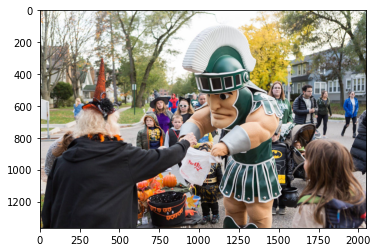

In [2]:
from urllib.request import urlopen, urlretrieve
import imageio


url = 'https://i1.wp.com/myfraternitylife.org/wp-content/uploads/2018/10/sparty.jpg?fit=2048%2C1365&ssl=1'
file = '.flags.jpeg'

urlretrieve(url, file);

A_RGB = imageio.imread(file)
print("Dimensions of image array:",A_RGB.shape)
plt.imshow(A_RGB);

Dimensions of green layer: (1365, 2048)


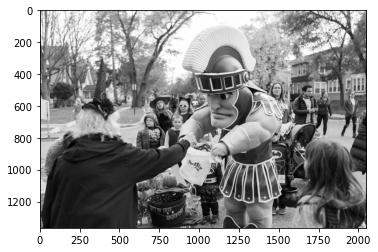

In [3]:
A = np.matrix(A_RGB[:,:,1].astype(float))
print("Dimensions of green layer:",A.shape)
plt.imshow(A, cmap='gray');

To perform image compression, we will need to compute the SVD of the matrix `A`, which is a $1365 \times 2048$ matrix. Hopefully, your computer is fast enough to do this in a couple seconds. But if it isn't, uncomment out these lines of code and run the cell to make a smaller version of this image.

In [ ]:
#ONLY UNCOMMENT THESE LINES OF CODE AND RUN THIS CELL IF THE SVD STEP BELOW TAKES TOO LONG

#from PIL import Image
#A = np.array(Image.fromarray(A).resize((204,136)))
#print("Dimensions of green layer:",A.shape)
#plt.imshow(A, cmap='gray');

#ONLY UNCOMMENT THESE LINES OF CODE AND RUN THIS CELL IF THE SVD STEP BELOW TAKES TOO LONG

## Step 1: Singular Value Decomposition
The following code does a singular value decomposition (SVD) of the image matrix $A$. 

$$A = U\Sigma V^\top$$

**Note:** The following cell may take a while to run.......hopefully you should only need to do this once...

In [4]:
U, e, Vt = np.linalg.svd(A)
U = np.matrix(U)
Vt = np.matrix(Vt)
print("Dimensions of matrix with left singular vectors:",U.shape)
print("Dimensions of matrix with right singular vectors:",Vt.shape)
print("Dimensions of array with singular values:",e.shape)

Dimensions of matrix with left singular vectors: (1365, 1365)
Dimensions of matrix with right singular vectors: (2048, 2048)
Dimensions of array with singular values: (1365,)


**<font color=red>QUESTION</font>** Remember that the numpy ```svd``` function returns an $m \times m$ matrix $U$, a vector of singular values $[\sigma_1,\ldots,\sigma_{\min(m,n)}]$ and an $n \times n$ matrix $V^T$.  Verify the success of the decomposition by regenerating $A$ from the calculated components and comparing the regenerated $A$ to the original image $A$ using the numpy ```allclose``` function.

In [10]:
#Put your answer here
np.linalg.svd(A)


(matrix([[-0.04240919,  0.01213699, -0.01172409, ..., -0.00050005,
          -0.0028649 , -0.00445793],
         [-0.04247074,  0.01219491, -0.01101261, ...,  0.00293345,
           0.00304659,  0.01700786],
         [-0.04253014,  0.01240358, -0.01161418, ..., -0.0036261 ,
          -0.0022475 , -0.02763094],
         ...,
         [-0.0167739 , -0.04071949,  0.01953229, ..., -0.0129083 ,
          -0.00167607,  0.01797767],
         [-0.0167815 , -0.04110891,  0.0206086 , ...,  0.0185915 ,
           0.01383704, -0.00532164],
         [-0.01681581, -0.04185883,  0.02082241, ..., -0.01491034,
          -0.00835292,  0.00287947]]),
 array([2.21749046e+05, 3.63793307e+04, 3.14262785e+04, ...,
        5.61431284e+00, 5.52107139e+00, 5.49343737e+00]),
 matrix([[-0.02736887, -0.02777956, -0.02816404, ..., -0.01400634,
          -0.01383677, -0.01363589],
         [-0.04778755, -0.04591415, -0.04412375, ..., -0.03466747,
          -0.03242407, -0.0310961 ],
         [-0.02996887, -0.0311673

**<font color=red>Question:</font>** We use the `np.allclose` function instead of a simple python equality (==) to account for small errors in calculation. Where do these errors come from?  

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

## Step 2: Removing small singular values.

We are now going to make a new image but only keep the $r$ biggest singular values while setting all of the rest to zero. First we define a new vector (```s```) consisting of the first $r=10$ singular values:

In [ ]:
#Put your answer here

s = 

Now let's remake the $\Sigma$ matrix using $s$. We will call this new $\Sigma$ matrix ```S``` (capital ```S```). We will use ```S``` to generate a new image and show the rsults:

In [14]:
# Sigma matrix should be the same size as the original A matrix with mostly zero values
S = np.zeros(A.shape)

# The upper left diagonal of the Sigma matrix should be the singular values
S[:len(s), :len(s)] = np.diag(s)

#new image
A_new = U*S*Vt

plt.imshow(A_new, cmap='gray')

NameError: name 's' is not defined

We can plot the difference between the original image and the image generated with only $r = 10$ singular values. This represents the error in the image at each pixel.

In [ ]:
# Plot difference
plt.imshow(A-A_new)

The following calculates the relative mean squared error for the image. 

In [ ]:
rel_mse = np.sum(np.array(A-A_new)**2)/np.sum(np.array(A)**2)
rel_mse

Although $10$ values seems like a good number, you can really see some distortion in the second image.  We want to find a better number for $r$. The following code makes a plot of the singular values to get an idea of the scale. Note that this plot has a $y$-axis that is logarithmic. 

In [ ]:
plt.plot(e)
plt.gca().set_yscale('log')
plt.xlabel('index')
plt.ylabel('singular value')


**<font color=red>Question:</font>** Next, Modify the code in **Step 2** to pick a different value for $r$ such that it is hard to tell the difference between the new image and the original image. Try to make this $r$ as small as possible. Describe The procedure you used to come up with a new value for $r$.  

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

## Step 3: Compression

The reason we set a bunch of singular values to zero is to save memory.  However, so far we haven't saved anything.  We can make an estimate of storage of the original image $A$ by multiplying the number of the rows by the number of columns (i.e this is how many numbers we need to store to recreate the image):

In [11]:
A.shape[0]*A.shape[1]

Our new SVD representation uses the matrices `U`, `V`, and the vector `s`, which requires even more space to store the same information!

In [13]:
U.shape[0]*U.shape[1] + len(s) + Vt.shape[0] * Vt.shape[1]

NameError: name 's' is not defined

However, the trick is that singular values of zero  don't add anything to the calculation and the zeros propagate though the math.  We can now make a new set of matrices, ```U_hat```,  ```S_hat``` and ```Vt_hat``` which are much smaller than ```U```, ```s```, ```Vt``` because we can remove the rows and columns that turn out to be zero in the math. 

In [ ]:
U_hat = np.matrix(U[:,:len(s)])
S_hat = np.diag(s)
Vt_hat = np.matrix(Vt[:len(s),:])

#Compressed image
A_compressed = U_hat*S_hat*Vt_hat
print(np.allclose(A_compressed,A_new)) # This is true if A_compressed = U_hat*S_hat*Vt_hat is close to A_new
plt.imshow(A_compressed, cmap='gray')

**<font color=red>Question:</font>** How much space is required to store ```U_hat```, ```s```, and ```Vt_hat```? 

In [ ]:
## Put your answer here

**<font color=red>Question:</font>** Calculate the compression ratio, i.e. the amount of space required to store the original image divided by the amount of space required to store the SVD representation.

In [ ]:
## Put your answer here

**<font color=red>Question:</font>** If everything from above is correct, then we demonstrated that converting an image to a reduced SVD format will save in memory storage. Describe at least two disadvantages of using SVD for image compression.

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

----
<a name="SVD_theory"></a>

# 3. Singular Value Decomposition Theory (Optional)

In the pre-class assignement, we computed the matrices $U$ and $V$ from the eigendecomposition of $AA^\top$ and $A^\top A$, and the matrix $\Sigma$ comes from the eigenvalues of $A^\top A$ or $AA^\top$. Here, we would like to explain why we can do this. Assume that $n\leq m$.

* We have $AA^\top = UD_1U^\top$ because $AA^\top$ is symmetric positive semidefinite. All diagonal elements in $D_1$ are nonnegative. Let $U=[u_1,\dots, u_m]$
* We have $A^\top A = VD_2V^\top$ because $A^\top A$ is symmetric positive semidefinite. All diagonal elements in $D_2$ are nonnegative. Note the size of $D_1$ may not be the same. $D_1$ has size $m\times m$, and $D_2$ has size $n\times n$. Let $V=[v_1,\dots, v_m]$
* Assume that $v_1$ is the unit eigenvector of $A^\top A$ corresponding to the eigenvalue $\sigma_1^2$. That is 
$$A^\top A v_1 = \sigma^2 v_1$$
Multiply $A$ to the left and we have 
$$AA^\top A v_1 = \sigma^2 Av_1$$
That is $Av_1$ is an eigenvector of $AA^\top$ corresponding to $\sigma_1^2$.
* WLOG, we assume that the diagonal elements of $D_1$ and $D_2$ are in decreasing order. That is $\sigma_1^2\geq \sigma_2^2\geq \dots \geq \sigma_r^2$, where $r$ is the rank of the matrix. $r\leq n\leq m$
* We measure the length of $Av_1$. 
$$(Av_1)\cdot (Av_1) = v_1 A^\top A v_1 = v_1 \cdot \sigma_1^2 v_1 = \sigma_1^2$$
That is $\|Av_1\|=\sigma_1$, and ${1\over\sigma_1}Av_1$ is an unit eigenvector of $AA^\top$ corresponding to $\sigma_1^2$.
* That is ${1\over \sigma_1}Av_1=\pm u_1$. Since we can change the sign for $u$, we let $u_1={1\over \sigma_1}Av_1$.
* Doing this from $\sigma_1$ to $\sigma_r$, we have 
$$[u_1, \cdots, u_r] = A [v_1,\cdots,v_r] \Sigma_{r\times r}^{-1}$$
where $\Sigma_{r\times r}$ is the diagonal matrix with elements $\sigma_1,\dots,\sigma_r$.
Therefore, we have 
$$[u_1, \cdots, u_r] \Sigma_{r\times r}= A [v_1,\cdots,v_r]$$

* By completing the orthogonal matrix, we have the full version. 
$$[u_1, \cdots, u_r,\cdots,u_m] \Sigma_{m\times n}= A [v_1,\cdots,v_r, \cdots, v_m]$$
That is $$A = U \Sigma V^\top$$
* Since $\Sigma$ only has $r$ nonzero elements, we have the simplified version 
That is $$A = U_{m\times r} \Sigma_{r\times r} (V_{n\times r})^\top$$



-----
### Congratulations, we're done!
